# Linear Regression

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
!git clone https://github.com/Dataweekends/zero_to_deep_learning_video.git

Cloning into 'zero_to_deep_learning_video'...
remote: Enumerating objects: 364, done.
remote: Total 364 (delta 0), reused 0 (delta 0), pack-reused 364
Receiving objects: 100% (364/364), 6.53 MiB | 22.88 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [0]:
df = pd.read_csv('zero_to_deep_learning_video/data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


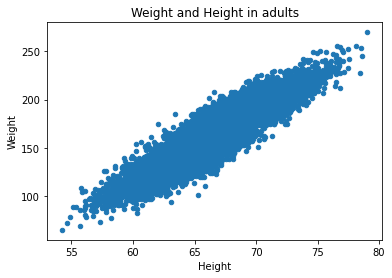

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

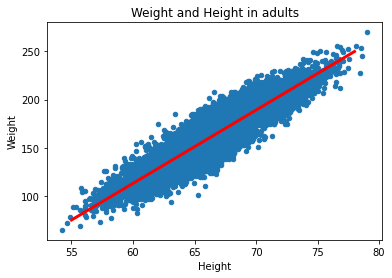

In [7]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [0]:
def line(x, w=0, b=0):
    return x * w + b

In [0]:
x = np.linspace(55, 80, 100)

In [10]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [42]:
yhat = line(x, w=8, b=-370)
yhat

array([ 70.        ,  72.02020202,  74.04040404,  76.06060606,
        78.08080808,  80.1010101 ,  82.12121212,  84.14141414,
        86.16161616,  88.18181818,  90.2020202 ,  92.22222222,
        94.24242424,  96.26262626,  98.28282828, 100.3030303 ,
       102.32323232, 104.34343434, 106.36363636, 108.38383838,
       110.4040404 , 112.42424242, 114.44444444, 116.46464646,
       118.48484848, 120.50505051, 122.52525253, 124.54545455,
       126.56565657, 128.58585859, 130.60606061, 132.62626263,
       134.64646465, 136.66666667, 138.68686869, 140.70707071,
       142.72727273, 144.74747475, 146.76767677, 148.78787879,
       150.80808081, 152.82828283, 154.84848485, 156.86868687,
       158.88888889, 160.90909091, 162.92929293, 164.94949495,
       166.96969697, 168.98989899, 171.01010101, 173.03030303,
       175.05050505, 177.07070707, 179.09090909, 181.11111111,
       183.13131313, 185.15151515, 187.17171717, 189.19191919,
       191.21212121, 193.23232323, 195.25252525, 197.27

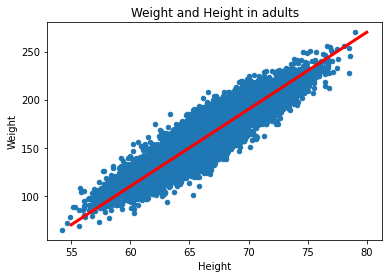

In [43]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [0]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [0]:
X = df[['Height']].values
y_true = df['Weight'].values

In [46]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [0]:
y_pred = line(X)

In [55]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [56]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

Text(0.5, 0, 'b')

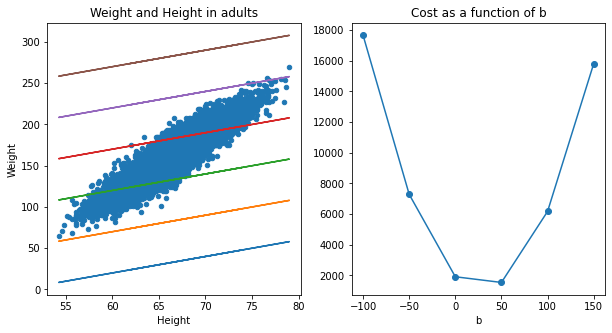

In [57]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [0]:
model = Sequential()

In [0]:
model.add(Dense(1, input_shape=(1,)))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [63]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s 48us/step - loss: 755.1777
Epoch 2/40
10000/10000 [==============================] - 0s 26us/step - loss: 541.0816
Epoch 3/40
10000/10000 [==============================] - 0s 24us/step - loss: 512.9881
Epoch 4/40
10000/10000 [==============================] - 0s 24us/step - loss: 440.1566
Epoch 5/40
10000/10000 [==============================] - 0s 26us/step - loss: 406.1992
Epoch 6/40
10000/10000 [==============================] - 0s 24us/step - loss: 379.3018
Epoch 7/40
10000/10000 [==============================] - 0s 25us/step - loss: 330.6054
Epoch 8/40
10000/10000 [==============================] - 0s 25us/step - loss: 291.5117
Epoch 9/40
10000/10000 [==============================] - 0s 24us/step - loss: 272.5233
Epoch 10/40
10000/10000 [==============================] - 0s 24us/step - loss: 255.6946
Epoch 11/40
10000/10000 [==============================] - 0s 27us/step - loss: 236.5826
Epoch 12/40
10000/10000 [=====

In [0]:
y_pred = model.predict(X)

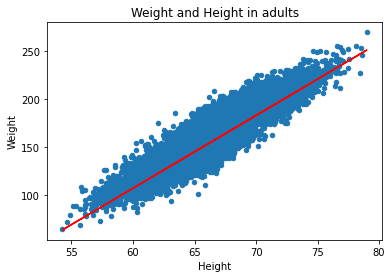

In [65]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [0]:
W, B = model.get_weights()

In [67]:
W

array([[7.597502]], dtype=float32)

In [68]:
B

array([-348.79144], dtype=float32)

## Evaluating Model Performance

In [0]:
from sklearn.metrics import r2_score

In [70]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.820


### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [73]:
len(X_train)

8000

In [74]:
len(X_test)

2000

In [0]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [76]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [0]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [0]:
from sklearn.metrics import mean_squared_error as mse

In [79]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	196.0
The Mean Squared Error on the Test set is:	189.3


In [80]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.809
The R2 score on the Test set is:	0.821


# Classification

In [0]:
df = pd.read_csv('zero_to_deep_learning_video/data/user_visit_duration.csv')

In [84]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


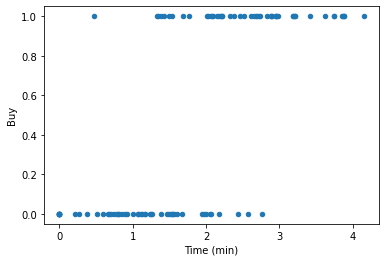

In [85]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [89]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 868us/step - loss: 0.7274 - accuracy: 0.5000
Epoch 2/25
100/100 [==============================] - 0s 122us/step - loss: 0.6300 - accuracy: 0.5500
Epoch 3/25
100/100 [==============================] - 0s 64us/step - loss: 0.5906 - accuracy: 0.6300
Epoch 4/25
100/100 [==============================] - 0s 81us/step - loss: 0.5695 - accuracy: 0.6500
Epoch 5/25
100/100 [==============================] - 0s 99us/step - loss: 0.5755 - accuracy: 0.6600
Epoch 6/25
100/100 [==============================] - 0s 63us/step - loss: 0.5466 - accuracy: 0.7200
Epoch 7/25
100/100 [==============================] - 0s 71us/step - loss: 0.4995 - accuracy: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 63us/step - loss: 0.4957 - accuracy: 0.7500
Epoch 9/25
100/100 [==============================] - 0s 58us/step - loss: 0.4937 - accuracy: 0.8000
Epoch 10/25
100/100 [==============================] - 0s 87us/step - loss: 0.4640 - accu

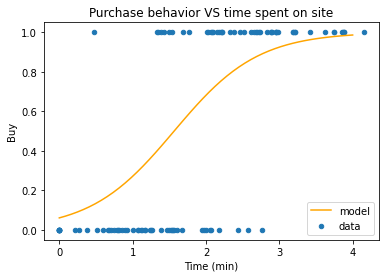

In [90]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [0]:
temp_class = model.predict(temp) > 0.5

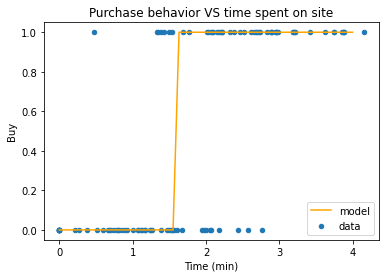

In [92]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [0]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [0]:
from sklearn.metrics import accuracy_score

In [95]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.810


### Train/Test split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [98]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [99]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [100]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.838
The test accuracy score is 0.800


## Cross Validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [0]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [0]:
from sklearn.model_selection import cross_val_score, KFold

In [0]:
cv = KFold(3, shuffle=True)

In [0]:
scores = cross_val_score(model, X, y, cv=cv)

In [107]:
scores

array([0.7647059 , 0.81818181, 0.87878788])

In [108]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8206 ± 0.0466


## Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y, y_class_pred)

array([[38, 12],
       [ 7, 43]])

In [0]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [113]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,38,12
Buy,7,43


In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.782
Recall:  	0.860
F1 Score:	0.819


In [0]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        50
           1       0.78      0.86      0.82        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100



## Feature Preprocessing

### Categorical Features

In [118]:
df = pd.read_csv('zero_to_deep_learning_video/data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [119]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [120]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [0]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [122]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [123]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [124]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


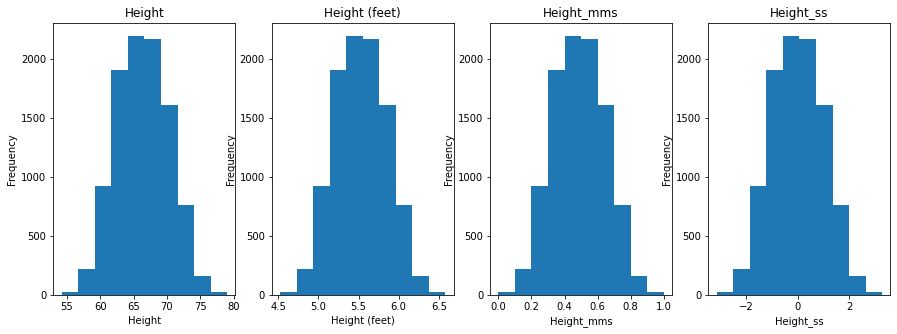

In [125]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [5]:
df = pd.read_csv("zero_to_deep_learning_video/data/housing-data.csv")
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
df['sqft_ss'] = ss.fit_transform(df[['sqft']])
df['bdrms_ss'] = ss.fit_transform(df[['bdrms']])
df['age_ss'] = ss.fit_transform(df[['age']])
df['price_ss'] = ss.fit_transform(df[['price']])

df.describe().round(2)

,sqft,bdrms,age,price,sqft_ss,bdrms_ss,age_ss,price_ss
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,-0.00,0.00,0.00,-0.00
std,794.70,0.76,22.87,125039.90,1.01,1.01,1.01,1.01
min,852.00,1.00,5.00,169900.00,-1.46,-2.88,-1.67,-1.38
25%,1432.00,3.00,24.50,249900.00,-0.72,-0.23,-0.81,-0.73
50%,1888.00,3.00,44.00,299900.00,-0.14,-0.23,0.06,-0.33
75%,2269.00,4.00,61.50,384450.00,0.34,1.10,0.83,0.36
max,4478.00,5.00,79.00,699900.00,3.15,2.43,1.60,2.91


In [0]:
#X = df[["sqft","bdrms","age"]].values
X = df[["sqft_ss","bdrms_ss","age_ss"]].values
Y = df[["price_ss"]].values

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [26]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')
model.summary()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model.fit(X_train, y_train, epochs=40)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
37/37 [==============================] - 0s 1ms/step - loss: 4.5770
Epoch 2/40
37/37 [==============================] - 0s 145us/step - loss: 1.0406
Epoch 3/40
37/37 [==============================] - 0s 151us/step - loss: 2.3343
Epoch 4/40
37/37 [==============================] - 0s 158us/step - loss: 1.7314
Epoch 5/40
37/37 [==============================] - 0s 142us/step - loss: 0.7683
Epoch 6/40
37/37 [==============================] - 0s 130us/step - loss: 0.4784
Epoch 7/40
37/37 [==============================] - 0s 130us/step - loss: 0.7870
Epoch 8/40
37/37 [==============================] - 0s 145us/step - loss: 0.7744
Epoch 9/

In [0]:
from sklearn.metrics import r2_score

In [28]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.660
The R2 score on the Test set is:	0.640


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [5]:
df = pd.read_csv("zero_to_deep_learning_video/data/HR_comma_sep.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
#Benchmark
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [37]:
pd.get_dummies(df['sales'], prefix='sales').head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [13]:
pd.get_dummies(df['salary'], prefix='salary').head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [89]:
x = pd.concat([df[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]], pd.get_dummies(df['salary'], prefix='salary'), pd.get_dummies(df['sales'], prefix='sales')], axis=1)
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [90]:
y = df["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [91]:
x.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium',
       'sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()

X = x.copy()
for key in X.keys():
  X[key] = ss.fit_transform(X[[key]])

Y = y.copy()


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
len(x_test)

3000

In [0]:
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid')) #input_dim=20 ?
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
11999/11999 [==============================] - 0s 31us/step - loss: 0.4488 - accuracy: 0.7849
Epoch 2/25
11999/11999 [==============================] - 0s 29us/step - loss: 0.4402 - accuracy: 0.7908
Epoch 3/25
11999/11999 [==============================] - 0s 29us/step - loss: 0.4420 - accuracy: 0.7904
Epoch 4/25
11999/11999 [==============================] - 0s 29us/step - loss: 0.4407 - accuracy: 0.7926
Epoch 5/25
11999/11999 [==============================] - 0s 28us/step - loss: 0.4410 - accuracy: 0.7896
Epoch 6/25
11999/11999 [==============================] - 0s 33us/step - loss: 0.4421 - accuracy: 0.7903
Epoch 7/25
11999/11999 [==============================] - 0s 31us/step - loss: 0.4407 - accuracy: 0.7869
Epoch 8/25
11999/11999 [==============================] - 0s 29us/step - loss: 0.4417 - accuracy: 0.7914
Epoch 9/25
11999/11999 [==============================] - 0s 29us/step - loss: 0.4423 - accuracy: 0.7866
Epoch 10/25
11999/11999 [==============================

In [0]:
y_test_pred = model.predict_classes(x_test)

In [98]:
y_test.ravel()

array([0, 0, 1, ..., 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
confusion_matrix(y_test, y_test_pred)

array([[2143,  133],
       [ 534,  190]])

In [0]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [102]:
pretty_confusion_matrix(y_test, y_test_pred, ['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2143,133
Leave,534,190


In [103]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2276
           1       0.59      0.26      0.36       724

    accuracy                           0.78      3000
   macro avg       0.69      0.60      0.61      3000
weighted avg       0.75      0.78      0.74      3000



In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=0) 

In [0]:
from sklearn.model_selection import KFold, cross_val_score


In [106]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, Y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7568 ± 0.0236


In [107]:
scores

array([0.76333332, 0.76366669, 0.73433334, 0.79400003, 0.72857618])